In [1]:
import SimpleITK as sitk
from platipy.imaging import ImageVisualiser
from platipy.imaging.registration.linear import linear_registration
from platipy.imaging.registration.utils import apply_linear_transform

In [2]:
image_set_A = sitk.ReadImage("./data/nifti/lung/PRHGD5257_RT_CT/IMAGES/PRHGD5257_RT_CT.nii.gz")
image_set_B = sitk.ReadImage("./data/nifti/lung/LCTSC-Test-S1-101/IMAGES/LCTSC_TEST_S1_101_0_CT_0.nii.gz")
image_set_C = sitk.ReadImage("./data/nifti/lung/LCTSC-Test-S1-201/IMAGES/LCTSC_TEST_S1_201_0_CT_0.nii.gz")

In [3]:
contours_A = {}
contours_B = {}

In [4]:
contours_A["LUNG_L"] = sitk.ReadImage("./data/nifti/lung/PRHGD5257_RT_CT/STRUCTURES/PRHGD5257_RT_CT_RTSTRUCT_LUNG_L.nii.gz")

In [5]:
contours_B["LUNG_R"] = sitk.ReadImage("./data/nifti/lung/LCTSC-Test-S1-101/STRUCTURES/LCTSC_TEST_S1_101_0_RTSTRUCT_LUNG_R.nii.gz")

In [6]:
contours_A["LUNG_R_B_BEFORE"] = contours_B["LUNG_R"]
contours_B["LUNG_L_A_BEFORE"] = contours_A["LUNG_L"]

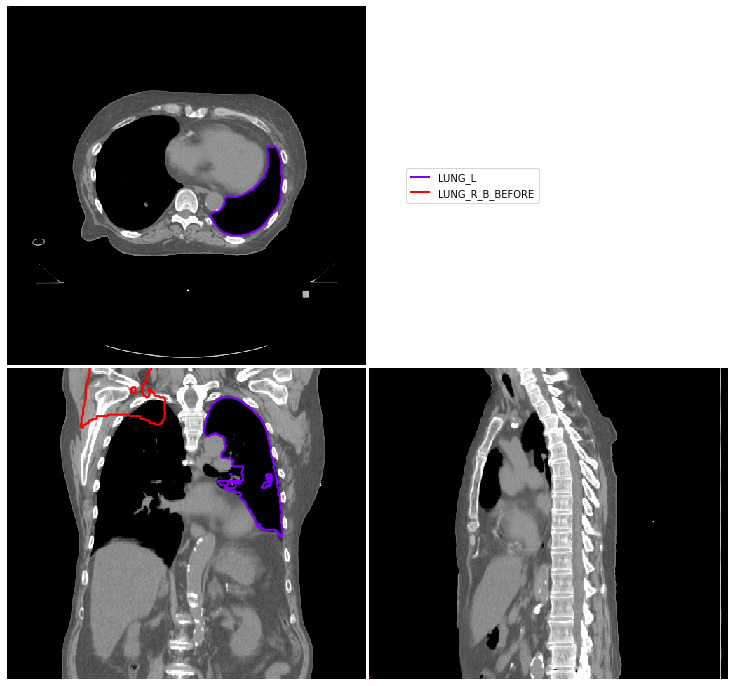

In [7]:
# visualise roi on initial datasets
vis = ImageVisualiser(image_set_A)
vis.add_contour(contours_A, linewidth=2)
fig = vis.show()

In [9]:
# visualise roi on initial datasets
# vis = ImageVisualiser(image_set_B)
# vis.add_contour(contours_B, linewidth=2)

# fig = vis.show()

In [8]:
# conduct image fusion using linear registration
fused_img, tfm = linear_registration(
    image_set_A,
    image_set_B,
    shrink_factors=[8],
    smooth_sigmas=[0],
    reg_method='rigid'
)
# the tfm is to transform image set B into image set A

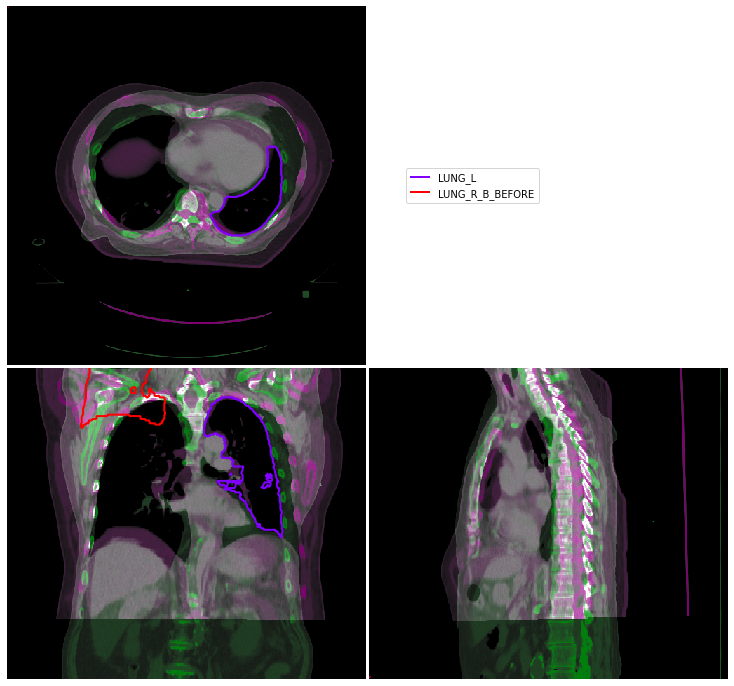

In [9]:
vis = ImageVisualiser(image_set_A)
vis.add_contour(contours_A, linewidth=2)
vis.add_comparison_overlay(fused_img)
fig = vis.show()

In [10]:
contours_A["LUNG_R_B_AFTER"] = apply_linear_transform(input_image=contours_B["LUNG_R"], transform=tfm, reference_image=fused_img, is_structure=True)

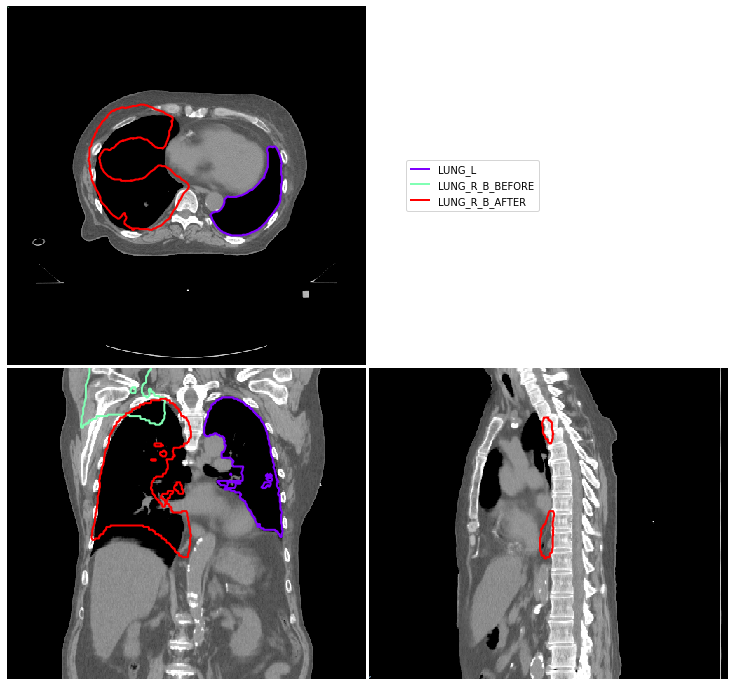

In [11]:
vis = ImageVisualiser(image_set_A)
vis.add_contour(contours_A, linewidth=2)
# vis.add_comparison_overlay(fused_img)
fig = vis.show()

In [12]:
print(tfm)

itk::simple::CompositeTransform
 CompositeTransform (000001E627F22680)
   RTTI typeinfo:   class itk::CompositeTransform<double,3>
   Reference Count: 1
   Modified Time: 64270
   Debug: Off
   Object Name: 
   Observers: 
     none
   Transforms in queue, from begin to end:
   >>>>>>>>>
   Euler3DTransform (000001E62810B870)
     RTTI typeinfo:   class itk::Euler3DTransform<double>
     Reference Count: 1
     Modified Time: 64257
     Debug: Off
     Object Name: 
     Observers: 
       none
     Matrix: 
       1 0 0 
       0 1 0 
       0 0 1 
     Offset: [-0.000121832, -31.0001, 203.3]
     Center: [0, -202.5, -650]
     Translation: [-0.000121832, -31.0001, 203.3]
     Inverse: 
       1 0 0 
       0 1 0 
       0 0 1 
     Singular: 0
     Euler's angles: AngleX=0 AngleY=0 AngleZ=0
     m_ComputeZYX = 0
   >>>>>>>>>
   VersorRigid3DTransform (000001E62810A7F0)
     RTTI typeinfo:   class itk::VersorRigid3DTransform<double>
     Reference Count: 1
     Modified Time: 64266
  

In [36]:
inverse = tfm.GetInverse()

In [30]:
print(tfm_A_to_B)

itk::simple::CompositeTransform
 CompositeTransform (000001E66E060420)
   RTTI typeinfo:   class itk::CompositeTransform<double,3>
   Reference Count: 1
   Modified Time: 166528
   Debug: Off
   Object Name: 
   Observers: 
     none
   Transforms in queue, from begin to end:
   >>>>>>>>>
   Euler3DTransform (000001E66E1A8800)
     RTTI typeinfo:   class itk::Euler3DTransform<double>
     Reference Count: 1
     Modified Time: 166515
     Debug: Off
     Object Name: 
     Observers: 
       none
     Matrix: 
       1 0 0 
       0 1 0 
       0 0 1 
     Offset: [0.000121832, 31.0001, -203.3]
     Center: [-0.000121832, -233.5, -446.7]
     Translation: [0.000121832, 31.0001, -203.3]
     Inverse: 
       1 0 0 
       0 1 0 
       0 0 1 
     Singular: 0
     Euler's angles: AngleX=0 AngleY=0 AngleZ=0
     m_ComputeZYX = 0
   >>>>>>>>>
   VersorRigid3DTransform (000001E66E1A8A10)
     RTTI typeinfo:   class itk::VersorRigid3DTransform<double>
     Reference Count: 1
     Modified T

In [13]:
from rt_utils import RTStructBuilder
import numpy as np

In [14]:
from platipy.dicom.io import nifti_to_rtstruct

In [15]:
# Load existing RT Struct. Requires the series path and existing RT Struct path
rtstruct = RTStructBuilder.create_new(
  dicom_series_path="./PRHGD5257/RT.CT/IMAGES"
)



In [16]:
 contours_A_test = { "LUNG_L": contours_A["LUNG_L"], "LUNG_R_B_AFTER": contours_A["LUNG_R_B_AFTER"] }

In [17]:
nifti_to_rtstruct.convert_nifti("./PRHGD5257/RT.CT/IMAGES", contours_A_test, "./PRHGD5257/RT.CT/new_rtss.dcm")

2021-09-03 22:42:00.682 | INFO     | platipy.dicom.io.nifti_to_rtstruct:convert_nifti:42 - Will convert the following Nifti masks to RTStruct:


Skipping empty mask layer
Skipping empty mask layer
Skipping empty mask layer
Skipping empty mask layer
Skipping empty mask layer
Skipping empty mask layer
Skipping empty mask layer
Skipping empty mask layer
Skipping empty mask layer
Skipping empty mask layer
Skipping empty mask layer
Skipping empty mask layer
Skipping empty mask layer
Skipping empty mask layer
Skipping empty mask layer
Skipping empty mask layer
Skipping empty mask layer
Skipping empty mask layer
Skipping empty mask layer
Skipping empty mask layer
Skipping empty mask layer
Skipping empty mask layer
Skipping empty mask layer
Skipping empty mask layer
Skipping empty mask layer
Skipping empty mask layer
Skipping empty mask layer
Skipping empty mask layer
Skipping empty mask layer
Skipping empty mask layer
Skipping empty mask layer
Skipping empty mask layer
Skipping empty mask layer
Skipping empty mask layer
Skipping empty mask layer
Skipping empty mask layer
Skipping empty mask layer
Skipping empty mask layer
Skipping emp

In [19]:
# Add ROI. This is the same as the above example.
rtstruct.add_roi(
  mask=contours_A["LUNG_R_B_AFTER"], 
  color=[255, 0, 255], 
  name="LUNG_R_B_AFTER"
)



AttributeError: 'Image' object has no attribute 'dtype'

In [20]:
rtstruct = RTStructBuilder.create_from(
  dicom_series_path="./PRHGD5257/RT.CT/IMAGES",
  rt_struct_path="./PRHGD5257/RT.CT/new_rtss.dcm"
)


In [3]:
from platipy.dicom.io import rtstruct_to_nifti

In [4]:
rtstruct = rtstruct_to_nifti.read_dicom_struct_file("./PRHGD5257/RT.CT/rtss.dcm")

In [5]:
mask_array = rtstruct_to_nifti.transform_point_set_from_dicom_struct(image_set_A, rtstruct)

NameError: name 'image_set_A' is not defined

In [32]:
mask_array[0][1]

<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x000001E651F566F0> >

AttributeError: 'FileDataset' object has no attribute 'get_roi_mask_by_name'

In [23]:
mask_3d

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

In [ ]:
# now try to transform roi from img set A to B

In [26]:
fused_img_A_to_B, tfm_A_to_B = linear_registration(
    image_set_B,
    image_set_A,
    shrink_factors=[8],
    smooth_sigmas=[0],
    reg_method='rigid'
)

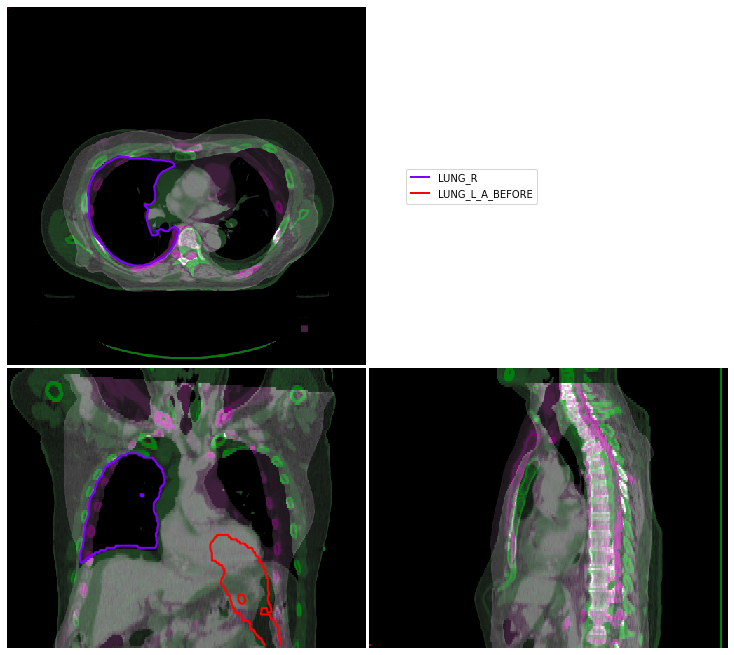

In [27]:
vis = ImageVisualiser(image_set_B)
vis.add_contour(contours_B)
vis.add_comparison_overlay(fused_img_A_to_B)
fig = vis.show()

In [39]:
contours_B["LUNG_L_A_AFTER"] = apply_linear_transform(input_image=contours_A["LUNG_L"], transform=inverse, reference_image=fused_img_A_to_B, is_structure=True)

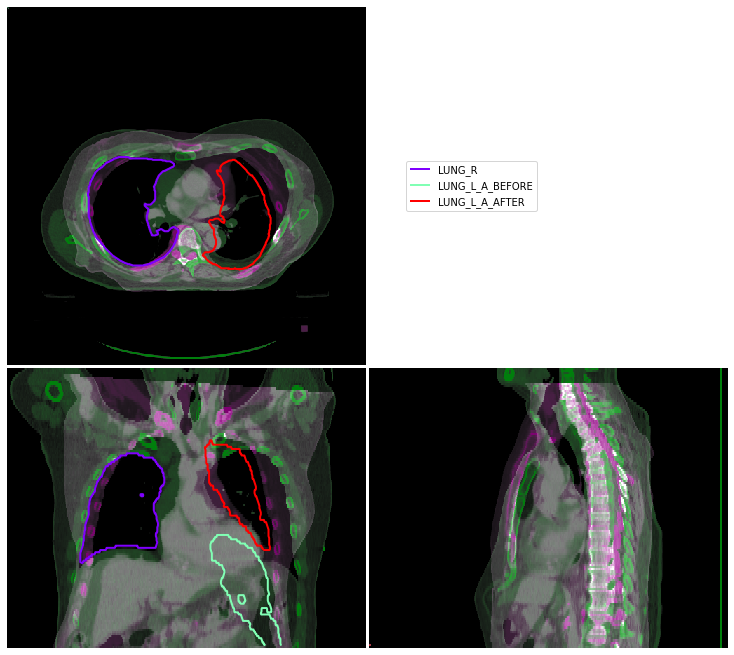

In [40]:
#ROI after transformation
vis = ImageVisualiser(image_set_B)
vis.add_contour(contours_B)
vis.add_comparison_overlay(fused_img_A_to_B)
fig = vis.show()

In [81]:
# conduct image fusion using linear registration
fused_img_C2A, tfm_C2A = linear_registration(
    image_set_A,
    image_set_C,
    shrink_factors=[8],
    smooth_sigmas=[0],
    reg_method='rigid'
)
# the tfm is to transform image set A into image set C

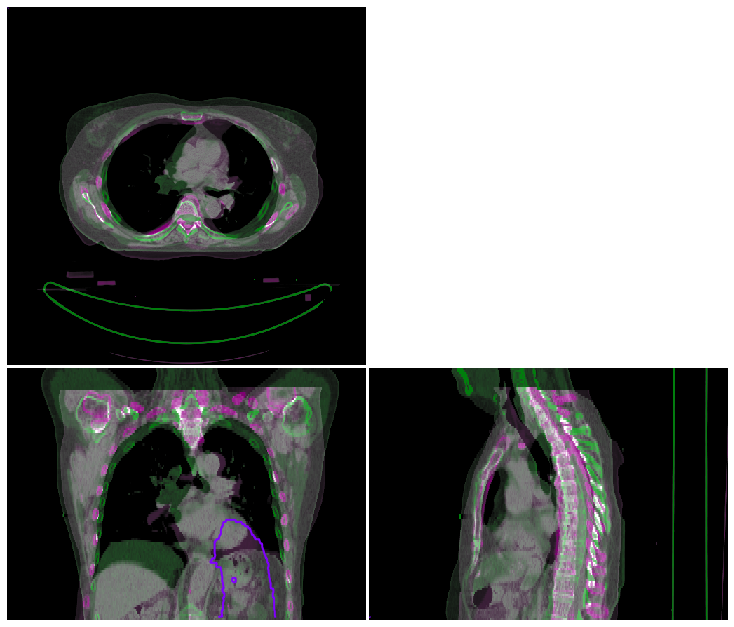

In [62]:
vis = ImageVisualiser(image_set_C)
vis.add_contour(contours_A["LUNG_L"])
vis.add_comparison_overlay(fused_img_C2A)
fig = vis.show()

In [63]:
contours_C = {}
contours_C["LUNG_L_A_AFTER"] = apply_linear_transform(
    input_image=contours_A["LUNG_L"], 
    transform=tfm_C2A, 
    reference_image=fused_img_C2A, 
    is_structure=True)

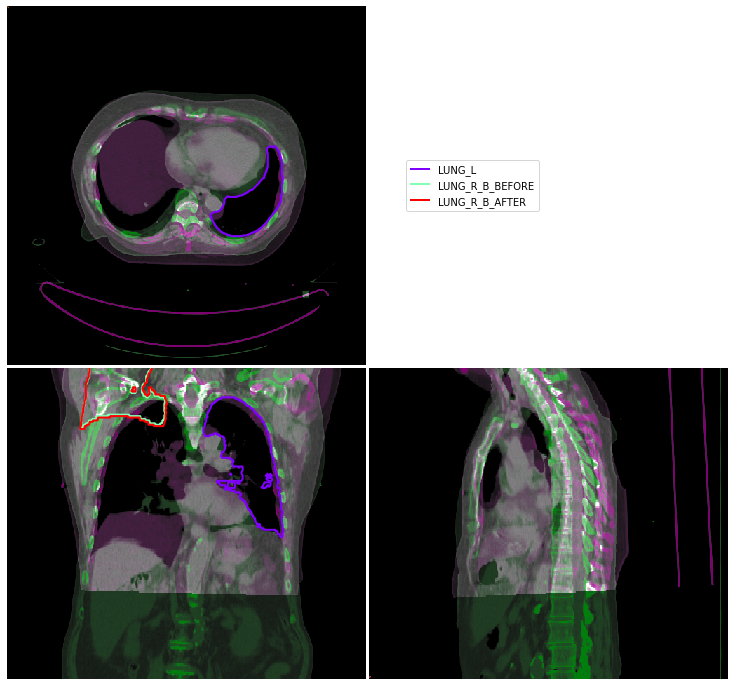

In [85]:
vis = ImageVisualiser(image_set_A)
vis.add_contour(contours_A)
vis.add_comparison_overlay(fused_img_C2A)
fig = vis.show()

In [24]:
print(rois)

Image (000002138A08FB80)
  RTTI typeinfo:   class itk::Image<short,3>
  Reference Count: 1
  Modified Time: 64575
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 64563
  UpdateMTime: 64574
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [1, 1, 1]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [1, 1, 1]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [1, 1, 1]
  Spacing: [0.976562, 0.976562, 2.0093]
  Origin: [-249.512, -452.012, -866]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
0.976562 0 0
0 0.976562 0
0 0 2.0093

  PointToIndexMatrix: 
1.024 0 0
0 1.024 0
0 0 0.497685

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (00000213895256E0)
      RTTI typeinfo:   class itk::ImportImageContainer<unsigned __int64,sho